In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

### Nicolás Aldecoa Rodrigo - 2022/10/09

![pseudocode](assets/eulers_method.jpg)

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from typing import Callable, Tuple
from tqdm import tqdm

In [3]:
def eulers_approximation(dx_dt: Callable, 
                         x0: float, 
                         delta_t: float, 
                         max_t: float
                         ) -> Tuple[np.ndarray, np.ndarray]:
    
    # calculate the number of iterations
    n_steps = int(max_t / delta_t) + 1
    
    t = np.empty(shape=(n_steps,), dtype=float)
    x_approx = np.empty(shape=(n_steps,), dtype=float)
    
    t[0] = 0
    x_approx[0] = x0
    
    # speed could be greatly improved by vectorizing the following operations,
    # but that would make the implementation harder to understand (that's my excuse)
    for i in tqdm(range(1, n_steps), desc='Running a simulation!'):
        t[i] = t[i - 1] + delta_t
        x_approx[i] = x_approx[i - 1] + delta_t * dx_dt(x_approx[i - 1])
        
    return t, x_approx


def plot_curves(t: np.ndarray,
                x_approx: np.ndarray, 
                x_of_t: Callable,
                figsize: Tuple[int, int] = (12, 6)
                ) -> None:
    
    # calculate the exact values for each timestep
    x_exact = x_of_t(t)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    
    # curves
    ax1.plot(t, x_exact, linestyle='--', color='black',
             label='Analytical solution')
    ax1.plot(t, x_approx, color = 'blue', alpha=0.8,
             label='Approximated solution')
    ax1.set_xlabel('t')
    ax1.set_ylabel('x')
    ax1.legend()
    
    # error
    error = np.abs(x_approx - x_exact)
    ax2.plot(t, error, color='orange', label='Abs. Approximation error')
    ax2.set_xlabel('t')
    ax2.set_ylabel('|approx - exact|')
    ax2.legend()
    
    fig.subplots_adjust(left=0.1)
    plt.show()

![example](./assets/eulers_method_homework_example.jpg)

In [4]:
# PARAMETERS FOR THE EXAMPLE dx/dt = 2x
K = 2
X0 = 1
DELTA_T = 0.01
MAX_T = 10

In [5]:
# DIFFERENTIAL EQUATION AND ANALYTICAL SOLUTION
diff_eq_1 = lambda x: K * x
solution_eq_1 = lambda t: X0 * np.exp(K * t)  # (!) make sure to use a vectorized expression 

Running a simulation!: 100%|████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1002702.37it/s]


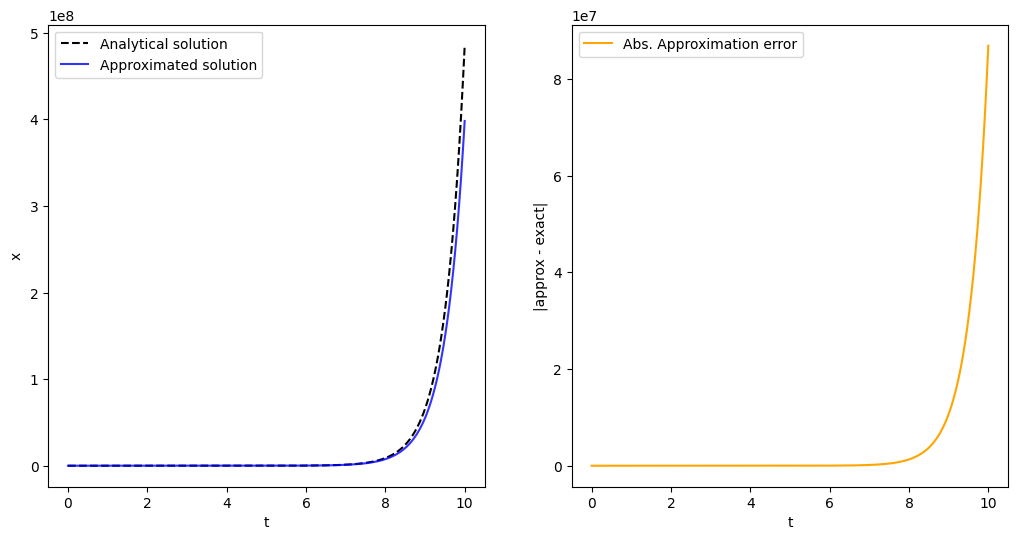

In [6]:
t_1, x_app_1 = eulers_approximation(
    dx_dt = diff_eq_1,
    x0 = X0,
    delta_t = DELTA_T,
    max_t = MAX_T
)

plot_curves(
    t = t_1,
    x_approx = x_app_1,
    x_of_t = solution_eq_1
)

### It's interesting to see that the approximation error is also an exponential, which actually makes sense.

Let's see the effect of the timestep size on the relative approximation error by exploring it in a logarithmic space: halving 20 times starting from delta_t = 1.0

I'll take the absolute error at the last timestep as my observable because I've already "seen" that it increases monotonically.

In [7]:
# USE THE SAME PARAMETERS AS BEFORE, JUST CHANGE DELTA_T
ts_sizes, errors = [], []
ts = 1
for n in range(20):
    t_n, x_app_n = eulers_approximation(
        dx_dt = diff_eq_1,
        x0 = X0,
        delta_t = ts,
        max_t = MAX_T
    )
    true_value_at_max_t = solution_eq_1(t_n[-1])
    err_last_ts = abs(x_app_n[-1] - true_value_at_max_t) / true_value_at_max_t
    ts_sizes.append(ts)
    errors.append(err_last_ts)
    ts /= 2

Running a simulation!: 100%|██████████████████████████████████████████████████████████████| 5242880/5242880 [00:04<00:00, 1292573.89it/s]


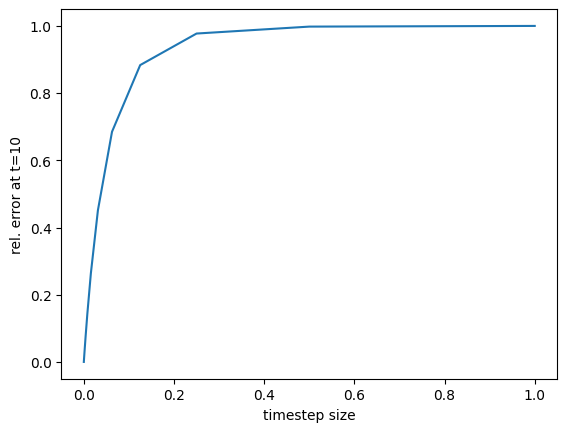

In [8]:
# plot the relative error as a function of the timestep size
plt.plot(ts_sizes, errors)
plt.xlabel('timestep size')
plt.ylabel(f'rel. error at t={MAX_T}')
plt.show()

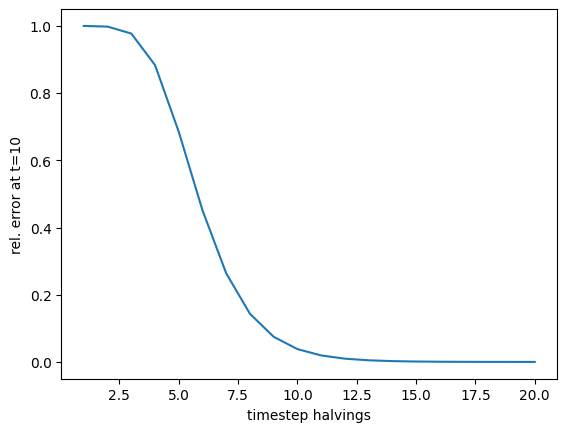

In [9]:
# let's see the same using a log scale
plt.plot(range(1,21), errors)
plt.xlabel('timestep halvings')
plt.ylabel(f'rel. error at t={MAX_T}')
plt.show()

## Let's approximate another function

In [10]:
# PARAMETERS FOR THE EXAMPLE dx/dt = Sx - sx
S = 4
s = 2
X0 = 1
DELTA_T = 0.01
MAX_T = 10

In [11]:
# DIFFERENTIAL EQUATION AND ANALYTICAL SOLUTION
diff_eq_2 = lambda x: S * x - s * x
solution_eq_2 = lambda t: X0 * np.exp((S-s) * t)  # (!) make sure to use a vectorized expression 

Running a simulation!: 100%|████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1001744.45it/s]


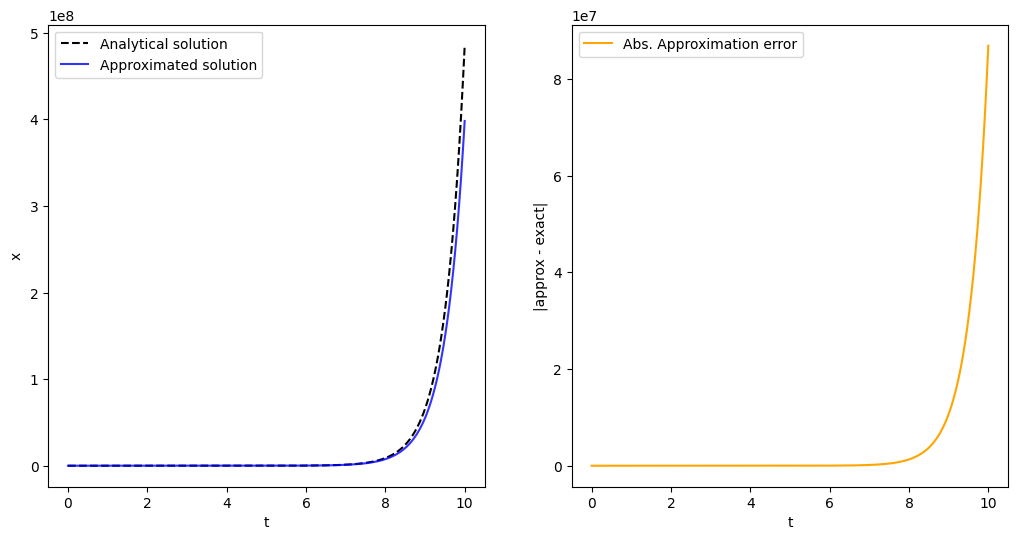

In [12]:
t_4, x_app_4 = eulers_approximation(
    dx_dt = diff_eq_2,
    x0 = X0,
    delta_t = DELTA_T,
    max_t = MAX_T
)

plot_curves(
    t = t_4,
    x_approx = x_app_4,
    x_of_t = solution_eq_2
)